In [29]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

In [30]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os 

In [31]:
import numpy as np

def parse_population_file_GA(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()

    generations_dict = {}
    current_gen = None
    current_population = []

    for line in lines:
        line = line.strip()
        if line.startswith("Generation"):
            # Save the previous generation's population
            if current_gen is not None:
                generations_dict[current_gen] = np.array(current_population) 
            # Start a new generation
            current_gen = int(line.split()[1].replace(":", ""))
            current_population = []
        elif line:
            # Convert string to numpy array for individual
            individual = np.fromstring(line.strip("[]"), sep=",")
            current_population.append(individual)

    # Save the last generation's population
    if current_gen is not None:
        generations_dict[current_gen] = np.array(current_population)

    return generations_dict


'''
file_path = 'diversity_train_generalist_1_3_4_6\\optimization_generalist_generalist_GA_20241014-124150\\all_generations_population_GA.txt'  # 替换为你的文件路径
population_dict = parse_population_file_GA(file_path)

for gen, population in population_dict.items():
    print(f"Generation {gen}:")
    print(population)
    
'''


'\nfile_path = \'diversity_train_generalist_1_3_4_6\\optimization_generalist_generalist_GA_20241014-124150\\all_generations_population_GA.txt\'  # 替换为你的文件路径\npopulation_dict = parse_population_file_GA(file_path)\n\nfor gen, population in population_dict.items():\n    print(f"Generation {gen}:")\n    print(population)\n    \n'

In [65]:
"""
population_dict.keys()
population_dict[0].shape
population_dict[1].shape
population_dict[0][1]

""" 

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

(100, 265)

(100, 265)

array([ 0.34597274, -0.03740283,  0.91721439, -0.20753602, -0.77389609,
        0.80972522,  0.96782316,  0.00684121,  0.02665877, -0.72658501,
        0.42182227,  0.39452571, -0.71161599,  0.96961577, -0.14190228,
        0.99417622,  0.65367136, -0.44314641, -0.03028726, -0.57199197,
       -0.12743297, -0.76639802, -0.20956918,  0.11517859,  0.32164118,
        0.05907344, -0.81742746, -0.9362169 , -0.47025179, -0.78316547,
       -0.65050094, -0.36502959, -0.55861865,  0.26521582,  0.50858262,
       -0.05783169, -0.05360857,  0.64973652, -0.80539301,  0.09345916,
       -0.31366973,  0.69130798, -0.85690632,  0.33902683,  0.0061934 ,
        0.05394687, -0.63012534,  0.98870962,  0.82433549,  0.69811745,
       -0.46581221,  0.9190073 , -0.18715364, -0.01489053,  0.67572244,
        0.44782413,  0.94795012,  0.76203142,  0.89029077,  0.42912827,
        0.76682461, -0.26457366,  0.33835033,  0.26523195, -0.65517379,
        0.63309158,  0.20266465, -0.96917783,  0.2329763 ,  0.16

In [28]:

'''

def parse_population_file_ES(file_path):
    """
    解析文件，将每一代的 population 转换为一个字典，key 是 generation，value 是 population，
    每个 individual 都以 ndarray 的形式保存，整个 population 是一个大的 ndarray。
    """
    with open(file_path, 'r') as f:
        lines = f.readlines()

    generations_dict = {}
    current_gen = None
    current_population = []
    individual_buffer = []

    for line in lines:
        line = line.strip()
        
        # 检查是否是 generation 标记
        if line.startswith("Generation"):
            # 保存上一个 generation 的 population
            if current_gen is not None and current_population:
                generations_dict[current_gen] = np.array(current_population)
            # 获取新的 generation 编号
            current_gen = int(line.split()[1].replace(":", ""))
            current_population = []  # 重置 population 列表
            continue
        
        # 合并 individual 的多行内容
        if "[" in line:
            individual_buffer = [line.strip("[]")]  # 初始化 individual 缓存
        else:
            individual_buffer.append(line.strip("[]"))
        
        # 如果发现 "]"，则认为 individual 结束
        if "]" in line:
            # 将缓存的 individual 转换为 numpy 数组
            individual_str = " ".join(individual_buffer)
            individual = np.fromstring(individual_str, sep=" ")
            current_population.append(individual)
            individual_buffer = []  # 清空缓存

    # 保存最后一代的 population
    if current_gen is not None and current_population:
        generations_dict[current_gen] = np.array(current_population)

    return generations_dict

file_path = 'diversity_train_generalist_1_3_4_6\\optimization_generalist_generalist_ES_20241014-124606\\all_generations_population_ES.txt'  # 替换为你的文件路径
population_dict_ES = parse_population_file_ES(file_path)

for gen, population in population_dict_ES.items():
    print(f"Generation {gen}:")
    print(population)

'''

'\n\ndef parse_population_file_ES(file_path):\n    """\n    解析文件，将每一代的 population 转换为一个字典，key 是 generation，value 是 population，\n    每个 individual 都以 ndarray 的形式保存，整个 population 是一个大的 ndarray。\n    """\n    with open(file_path, \'r\') as f:\n        lines = f.readlines()\n\n    generations_dict = {}\n    current_gen = None\n    current_population = []\n    individual_buffer = []\n\n    for line in lines:\n        line = line.strip()\n        \n        # 检查是否是 generation 标记\n        if line.startswith("Generation"):\n            # 保存上一个 generation 的 population\n            if current_gen is not None and current_population:\n                generations_dict[current_gen] = np.array(current_population)\n            # 获取新的 generation 编号\n            current_gen = int(line.split()[1].replace(":", ""))\n            current_population = []  # 重置 population 列表\n            continue\n        \n        # 合并 individual 的多行内容\n        if "[" in line:\n            individual_buffer = [line.strip("[]"

In [42]:
"""
population_dict_ES.keys()
population_dict.keys()
population_dict_ES[0].shape
population_dict[0].shape 
population_dict_ES.items()
""" 

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

(100, 265)

(100, 265)

dict_items([(0, array([[ 0.58072446,  0.95181177,  0.39263702, ..., -0.63709193,
         0.5574157 ,  0.22705164],
       [ 0.11271671, -0.23192029,  0.52221431, ..., -0.311522  ,
        -0.16394987, -0.97252832],
       [ 0.38913934,  0.67177226, -0.79300094, ...,  0.43329375,
        -0.0905454 , -0.75323224],
       ...,
       [ 0.11446933, -0.30256954, -0.42492061, ..., -0.71744804,
        -0.19644415, -0.55993815],
       [ 0.8508944 , -0.84633445,  0.82049534, ..., -0.73641883,
         0.07627596,  0.98426322],
       [ 0.60149794, -0.85331559,  0.14292898, ...,  0.58837792,
         0.53357531, -0.4113446 ]])), (1, array([[ 0.06894883, -0.55776535,  0.26940231, ..., -0.17115664,
        -0.3399887 ,  0.1285478 ],
       [ 0.60892748, -0.17150203,  0.24420112, ...,  0.9153471 ,
         0.73837865, -0.2971056 ],
       [ 0.06894883, -0.55776535,  0.26940231, ..., -0.17115664,
        -0.3399887 ,  0.1285478 ],
       ...,
       [ 0.93072418, -0.69627141,  0.07206235, ...,  

In [88]:
def similarity(population_dict):

    """
    计算每一代的 population 中所有 individual 两两之间的相似度。
    """

    generations_similarity = {}

    cos_avg_list = []
    cos_std_list = []
    euler_avg_list = []
    euler_std_list = []
    variance_avg_list = []

    for gen, population in population_dict.items():

        cos_vector = []
        euler_vector = []   
        
        for i in range(population.shape[0]):
            for j in range(i+1, population.shape[0]):
                individual1 = population[i]
                individual2 = population[j]
                cos_similarity = np.dot(individual1, individual2) / (np.linalg.norm(individual1) * np.linalg.norm(individual2))
                euler_distance = np.linalg.norm(individual1 - individual2)
                cos_vector.append(cos_similarity)
                euler_vector.append(euler_distance)

        if np.max(euler_vector) == 0:
            euler_vector = np.zeros_like(euler_vector)
        else: 
            euler_vector = 1-np.array(euler_vector)/np.max(euler_vector)
        
        cos_vector = np.array(cos_vector)

        cos_avg = np.mean(cos_vector)
        cos_std = np.std(cos_vector)
        euler_avg = np.mean(euler_vector)
        euler_std = np.std(euler_vector)

        variance_per_dimension = np.var(population, axis=0)
        variance_avg = np.mean(variance_per_dimension)


        generations_similarity[gen] = [cos_avg, cos_std, euler_avg, euler_std, variance_avg]

        cos_avg_list.append(cos_avg)
        cos_std_list.append(cos_std)
        euler_avg_list.append(euler_avg)
        euler_std_list.append(euler_std)
        variance_avg_list.append(variance_avg)

    process_cos_avg = np.mean(cos_avg_list)
    process_cos_std = np.mean(cos_std_list)
    process_euler_avg = np.mean(euler_avg_list)
    process_euler_std = np.mean(euler_std_list)
    process_variance_avg = np.mean(variance_avg_list)

    similarity_final = [process_cos_avg, process_cos_std, process_euler_avg, process_euler_std, process_variance_avg]
    
    

    return generations_similarity, generations_similarity[gen], similarity_final 





In [90]:


def stat_file_transfer(file_path):
    # Initialize lists to store generation and max values
    generation_values = []
    max_values = []
    avg_values = []

    # Open the file and read it line by line
    with open(file_path, 'r') as file:
        # Skip the header
        next(file)
        
        # Read the rest of the file
        for line in file:
            # Split the line into parts
            parts = line.split()
            
            # Extract the generation (gen) and max value
            gen = float(parts[0])
            max_val = float(parts[2])
            avg_val = float(parts[1])
            
            # Append to the lists
            generation_values.append(gen)
            max_values.append(max_val)
            avg_values.append(avg_val)

    # Get the last generation and max value
    last_gen = generation_values[-1]
    last_max = max_values[-1]
    last_avg = avg_values[-1]

    # Combine them into a list
    max_result = [last_gen, last_max]
    avg_result = [last_gen, last_avg]
    
    return max_result, avg_result



[30.0, 27.664701]

In [89]:
import os

def algorithm_evaluation(parent_directory):
    # Initialize lists to store data
    all_generations_data = []
    stats_data = []
    EA_type=[]

    # Define the parent directory
    if parent_directory == 'experiments_train_generalist_1_3_4_6':
        # Initialize lists to store data
        

        # Iterate over all directories in the parent directory
        for folder_name in os.listdir(parent_directory):
            # Check if the folder name starts with 'optimization_generalist_'
            if folder_name.startswith('optimization_generalist_generalist_GA1'):
                folder_path = os.path.join(parent_directory, folder_name)
                
                # Paths to the target files
                all_generations_file = os.path.join(folder_path, 'all_generations_population_GA.txt')
                stats_file = os.path.join(folder_path, 'stats.txt')
                
                # Check if the files exist, and if so, read them
                if os.path.exists(all_generations_file):
                    with open(all_generations_file, 'r') as ag_file:
                        population_dict = parse_population_file_GA(all_generations_file)
                        _,_, generations_similarity_final = similarity(population_dict)
                        all_generations_data.append(generations_similarity_final)
                
                if os.path.exists(stats_file):
                    with open(stats_file, 'r') as st_file:
                        _,avg_result = stat_file_transfer(stats_file)  # avg_fitness result in the last generation
                        stats_data.append(avg_result)

                EA_type.append('GA1')

            elif folder_name.startswith('optimization_generalist_generalist_GA2'):

                folder_path = os.path.join(parent_directory, folder_name)
                
                # Paths to the target files
                all_generations_file = os.path.join(folder_path, 'all_generations_population_GA.txt')
                stats_file = os.path.join(folder_path, 'stats.txt')
                
                # Check if the files exist, and if so, read them
                if os.path.exists(all_generations_file):
                    with open(all_generations_file, 'r') as ag_file:
                        population_dict = parse_population_file_GA(all_generations_file)
                        _,_, generations_similarity_final = similarity(population_dict)
                        all_generations_data.append(generations_similarity_final)
                
                if os.path.exists(stats_file):
                    with open(stats_file, 'r') as st_file:
                        _,avg_result = stat_file_transfer(stats_file)
                        stats_data.append(avg_result)

                EA_type.append('GA2')

            else:
                print(f"Skipping folder: {folder_name}")

        return all_generations_data, stats_data, EA_type
    

    elif parent_directory == 'experiments_train_generalist_2_5_7_8':

        # Iterate over all directories in the parent directory
        for folder_name in os.listdir(parent_directory):
            # Check if the folder name starts with 'optimization_generalist_'
            if folder_name.startswith('optimization_generalist_generalist_GA1'):
                folder_path = os.path.join(parent_directory, folder_name)
                
                # Paths to the target files
                all_generations_file = os.path.join(folder_path, 'all_generations_population_GA.txt')
                stats_file = os.path.join(folder_path, 'stats.txt')
                
                # Check if the files exist, and if so, read them
                if os.path.exists(all_generations_file):
                    with open(all_generations_file, 'r') as ag_file:
                        population_dict = parse_population_file_GA(all_generations_file)
                        _,_, generations_similarity_final = similarity(population_dict)
                        all_generations_data.append(generations_similarity_final)
                
                if os.path.exists(stats_file):
                    with open(stats_file, 'r') as st_file:
                        _,avg_result = stat_file_transfer(stats_file)
                        stats_data.append(avg_result)

                EA_type.append('GA1')

            elif folder_name.startswith('optimization_generalist_generalist_GA2'):

                folder_path = os.path.join(parent_directory, folder_name)
                
                # Paths to the target files
                all_generations_file = os.path.join(folder_path, 'all_generations_population_GA.txt')
                stats_file = os.path.join(folder_path, 'stats.txt')
                
                # Check if the files exist, and if so, read them
                if os.path.exists(all_generations_file):
                    with open(all_generations_file, 'r') as ag_file:
                        population_dict = parse_population_file_GA(all_generations_file)
                        _,_, generations_similarity_final = similarity(population_dict)
                        all_generations_data.append(generations_similarity_final)
                
                if os.path.exists(stats_file):
                    with open(stats_file, 'r') as st_file:
                        _,avg_result = stat_file_transfer(stats_file)
                        stats_data.append(avg_result)

                EA_type.append('GA2')

            else:
                print(f"Skipping folder: {folder_name}")

        return all_generations_data, stats_data, EA_type
    

    else: 
        print(f"there is no such parent directory: {parent_directory}")

    


                

In [75]:

parent_directory = 'experiments_train_generalist_2_5_7_8'

all_generations_data, stats_data, EA_type =algorithm_evaluation(parent_directory)

all_generations_data    

stats_data 

EA_type


[[0.8250205780923077,
  0.07454676767064354,
  0.5581908153527405,
  0.3148097637032099,
  0.05957694313837603],
 [0.8018988879948913,
  0.07847098269013478,
  0.5192404599695347,
  0.24861726341193033,
  0.06725810915993607],
 [0.7293529964645742,
  0.1275951697994434,
  0.5610936363186344,
  0.29157626301232525,
  0.09243388085720619],
 [0.7731009661868203,
  0.08059580306121862,
  0.7049685806089506,
  0.23804067779318122,
  0.07807883634963131],
 [0.7969768330568044,
  0.11461101953491341,
  0.4447212355262618,
  0.19435171951183666,
  0.06888744617540865],
 [0.7748325164156533,
  0.10227327542107123,
  0.5949415899375439,
  0.2828677512336896,
  0.07708514581318182],
 [0.7857413463950459,
  0.12317648255097119,
  0.561080101233336,
  0.31491659039986475,
  0.07185721712314691],
 [0.762852248325866,
  0.12396452001697045,
  0.554871611074653,
  0.27696325455135395,
  0.08301398676690462],
 [0.8164801423879211,
  0.09179125522890288,
  0.18197976537772637,
  0.09874966463281297,
  0

[[46.0, 85.566727],
 [46.0, 81.753809],
 [46.0, 84.289937],
 [46.0, 83.045895],
 [46.0, 85.577017],
 [46.0, 85.348162],
 [46.0, 84.489514],
 [46.0, 87.599808],
 [46.0, 84.966641],
 [46.0, 82.558273],
 [46.0, 79.4147],
 [46.0, 78.26108],
 [46.0, 73.991803],
 [46.0, 64.155301],
 [46.0, 76.581805],
 [46.0, 72.362391],
 [46.0, 77.832954],
 [46.0, 77.818065],
 [46.0, 74.76491],
 [46.0, 73.151072]]

['GA1',
 'GA1',
 'GA1',
 'GA1',
 'GA1',
 'GA1',
 'GA1',
 'GA1',
 'GA1',
 'GA1',
 'GA2',
 'GA2',
 'GA2',
 'GA2',
 'GA2',
 'GA2',
 'GA2',
 'GA2',
 'GA2',
 'GA2']

In [91]:
parent_directory = 'experiments_train_generalist_1_3_4_6'

all_generations_data_2, stats_data_2, EA_type_2 =algorithm_evaluation(parent_directory)

all_generations_data_2    

stats_data_2

EA_type_2


[[0.8184668639393117,
  0.054572348866104174,
  0.3292839715819983,
  0.12455952141912052,
  0.06022895652072919],
 [0.7783101637342027,
  0.12575559238333878,
  0.4524260098223817,
  0.2625002170504251,
  0.07287076490000081],
 [0.7111497303037422,
  0.13518140284197463,
  0.48689237957461595,
  0.2538756413257711,
  0.10041443834066666],
 [0.7539647973160529,
  0.11633023023409904,
  0.47596239186769823,
  0.214774298626611,
  0.08176447012241826],
 [0.7969711068570875,
  0.1053454147690277,
  0.35674626142563876,
  0.17086402322457542,
  0.06859450820392635],
 [0.7884846698568277,
  0.07058009625998221,
  0.383220767606263,
  0.1663317282222254,
  0.07222223955251497],
 [0.834781801270076,
  0.054973791193636073,
  0.6078894256127289,
  0.24469835640841336,
  0.05636817301280593],
 [0.7987279443754133,
  0.06894299829705647,
  0.5761094838466744,
  0.2954324207214225,
  0.07092898617000609],
 [0.7372581443515199,
  0.11766101200685405,
  0.6147479723237239,
  0.2526988838783986,
  0

[[46.0, 50.214143],
 [46.0, 55.390521],
 [46.0, 41.630604],
 [46.0, 36.714686],
 [46.0, 58.44569],
 [46.0, 41.907562],
 [46.0, 45.878126],
 [46.0, 45.9211],
 [46.0, 27.196257],
 [46.0, 42.899025],
 [46.0, 19.935679],
 [46.0, 19.650492],
 [46.0, 19.917029],
 [46.0, 19.894958],
 [46.0, 19.929638],
 [46.0, 19.571373],
 [46.0, 20.01002],
 [46.0, 19.883909],
 [46.0, 19.470478],
 [46.0, 19.620027]]

['GA1',
 'GA1',
 'GA1',
 'GA1',
 'GA1',
 'GA1',
 'GA1',
 'GA1',
 'GA1',
 'GA1',
 'GA2',
 'GA2',
 'GA2',
 'GA2',
 'GA2',
 'GA2',
 'GA2',
 'GA2',
 'GA2',
 'GA2']

In [93]:


df_1=pd.DataFrame(all_generations_data, columns=['cos_avg', 'cos_std', 'euler_avg', 'euler_std', 'variance_avg'])
df_2=pd.DataFrame(stats_data, columns=['generation', 'avg_fitness'])
df_3=pd.DataFrame(EA_type, columns=['EA_type'])
df_merge=pd.concat([df_1, df_2, df_3], axis=1)


df_4=pd.DataFrame(all_generations_data_2, columns=['cos_avg', 'cos_std', 'euler_avg', 'euler_std', 'variance_avg'])
df_5=pd.DataFrame(stats_data_2, columns=['generation', 'avg_fitness'])
df_6=pd.DataFrame(EA_type_2, columns=['EA_type'])
df_merge_2=pd.concat([df_4, df_5, df_6], axis=1)

df_merge.to_csv('df_merge_2578.csv')
df_merge_2.to_csv('df_merge_1346.csv')



df_merge
df_merge_2

,cos_avg,cos_std,euler_avg,euler_std,variance_avg,generation,avg_fitness,EA_type
0,0.825021,0.074547,0.558191,0.314810,0.059577,46.0,85.566727,GA1
1,0.801899,0.078471,0.519240,0.248617,0.067258,46.0,81.753809,GA1
2,0.729353,0.127595,0.561094,0.291576,0.092434,46.0,84.289937,GA1
3,0.773101,0.080596,0.704969,0.238041,0.078079,46.0,83.045895,GA1
4,0.796977,0.114611,0.444721,0.194352,0.068887,46.0,85.577017,GA1
5,0.774833,0.102273,0.594942,0.282868,0.077085,46.0,85.348162,GA1
6,0.785741,0.123176,0.561080,0.314917,0.071857,46.0,84.489514,GA1
7,0.762852,0.123965,0.554872,0.276963,0.083014,46.0,87.599808,GA1
8,0.816480,0.091791,0.181980,0.098750,0.062275,46.0,84.966641,GA1
9,0.759139,0.133092,0.520571,0.269298,0.082456,46.0,82.558273,GA1


,cos_avg,cos_std,euler_avg,euler_std,variance_avg,generation,avg_fitness,EA_type
0,0.818467,0.054572,0.329284,0.124560,0.060229,46.0,50.214143,GA1
1,0.778310,0.125756,0.452426,0.262500,0.072871,46.0,55.390521,GA1
2,0.711150,0.135181,0.486892,0.253876,0.100414,46.0,41.630604,GA1
3,0.753965,0.116330,0.475962,0.214774,0.081764,46.0,36.714686,GA1
4,0.796971,0.105345,0.356746,0.170864,0.068595,46.0,58.445690,GA1
5,0.788485,0.070580,0.383221,0.166332,0.072222,46.0,41.907562,GA1
6,0.834782,0.054974,0.607889,0.244698,0.056368,46.0,45.878126,GA1
7,0.798728,0.068943,0.576109,0.295432,0.070929,46.0,45.921100,GA1
8,0.737258,0.117661,0.614748,0.252699,0.088821,46.0,27.196257,GA1
9,0.763154,0.139563,0.223101,0.137871,0.081155,46.0,42.899025,GA1


<Axes: xlabel='cos_avg', ylabel='avg_fitness'>

Text(0.5, 1.0, 'Upper Y-Range of Fitness')

Text(0, 0.5, 'Average Fitness (Upper)')

<Axes: xlabel='cos_avg', ylabel='avg_fitness'>

Text(0.5, 1.0, 'Lower Y-Range of Fitness')

Text(0.5, 0, 'Cosine Average (cos_avg)')

Text(0, 0.5, 'Average Fitness (Lower)')

(62.0, 90.0)

(10.0, 60.0)

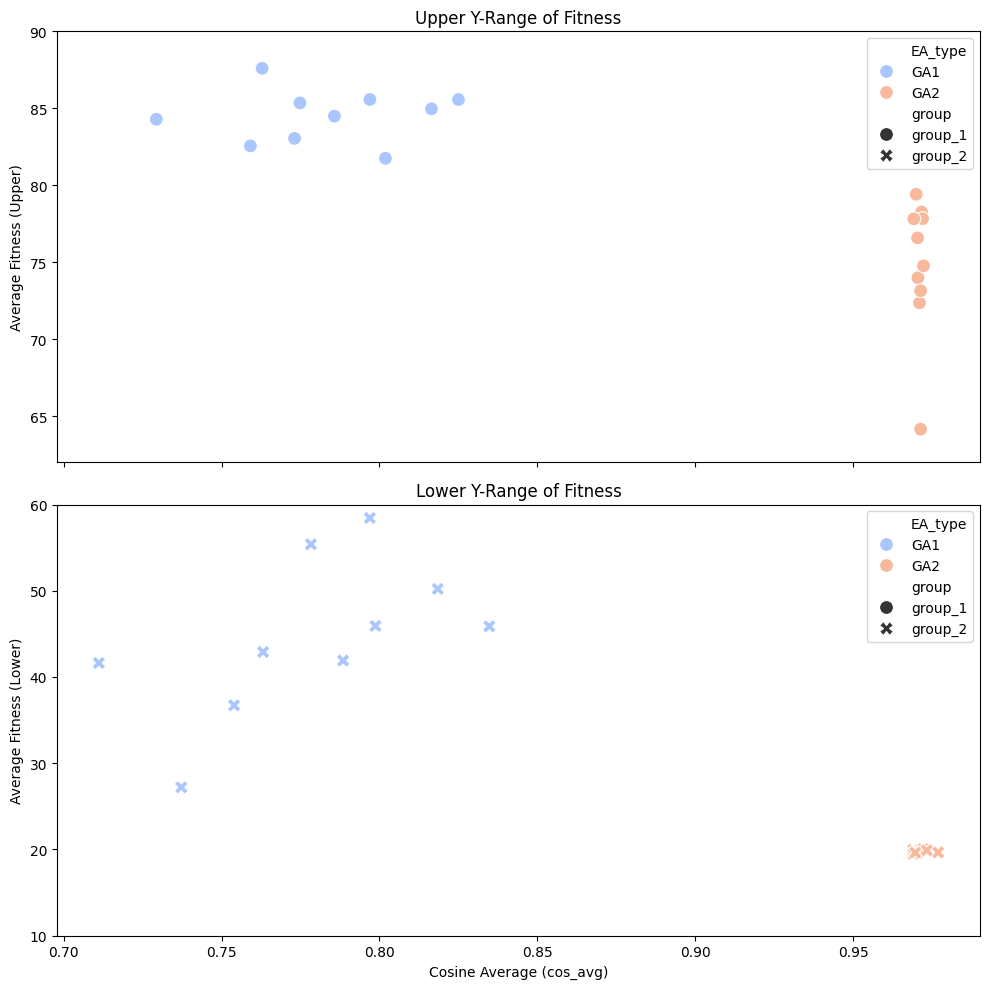

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_merge["group"]='group_1'
df_merge_2["group"]='group_2'
df_final=pd.concat([df_merge, df_merge_2], axis=0)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# First subplot (upper half)
sns.scatterplot(
    x='cos_avg', 
    y='avg_fitness', 
    hue='EA_type', 
    style='group', 
    palette='coolwarm', 
    data=df_final,
    s=100,
    ax=ax1  # Plot on the first axis
)
ax1.set_title('Upper Y-Range of Fitness')
ax1.set_ylabel('Average Fitness (Upper)')

# Second subplot (lower half)
sns.scatterplot(
    x='cos_avg', 
    y='avg_fitness', 
    hue='EA_type', 
    style='group', 
    palette='coolwarm', 
    data=df_final,
    s=100,
    ax=ax2  # Plot on the second axis
)
ax2.set_title('Lower Y-Range of Fitness')
ax2.set_xlabel('Cosine Average (cos_avg)')
ax2.set_ylabel('Average Fitness (Lower)')

# Adjust the y-axis ranges for better visualization (optional)
ax1.set_ylim(62, 90)  # Adjust this to fit your upper y-range
ax2.set_ylim(10, 60)  # Adjust this to fit your lower y-range

# Show the plot
plt.tight_layout()
plt.show()

<Axes: xlabel='cos_avg', ylabel='avg_fitness'>

Text(0.5, 1.0, 'Upper Y-Range of Fitness')

Text(0, 0.5, 'Average Fitness (Upper)')

<Axes: xlabel='cos_avg', ylabel='avg_fitness'>

Text(0.5, 1.0, 'Lower Y-Range of Fitness')

Text(0.5, 0, 'Cosine Average (cos_avg)')

Text(0, 0.5, 'Average Fitness (Lower)')

(60.0, 90.0)

(20.0, 60.0)

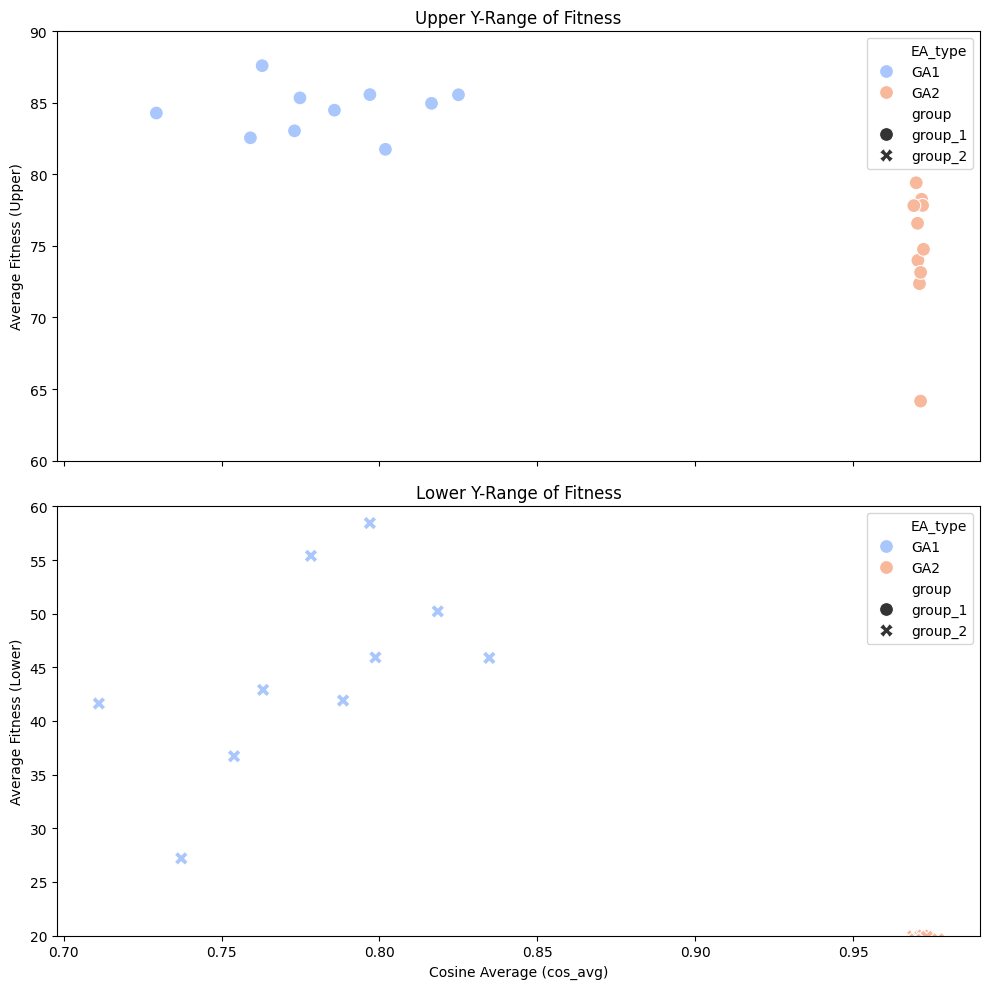

In [101]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# First subplot (upper half)
sns.scatterplot(
    x='cos_avg', 
    y='avg_fitness', 
    hue='EA_type', 
    style='group', 
    palette='coolwarm', 
    data=df_final,
    s=100,
    ax=ax1  # Plot on the first axis
)
ax1.set_title('Upper Y-Range of Fitness')
ax1.set_ylabel('Average Fitness (Upper)')

# Second subplot (lower half)
sns.scatterplot(
    x='cos_avg', 
    y='avg_fitness', 
    hue='EA_type', 
    style='group', 
    palette='coolwarm', 
    data=df_final,
    s=100,
    ax=ax2  # Plot on the second axis
)
ax2.set_title('Lower Y-Range of Fitness')
ax2.set_xlabel('Cosine Average (cos_avg)')
ax2.set_ylabel('Average Fitness (Lower)')

# Adjust the y-axis ranges for better visualization (optional)
ax1.set_ylim(60, 90)  # Adjust this to fit your upper y-range
ax2.set_ylim(20, 60)  # Adjust this to fit your lower y-range

# Show the plot
plt.tight_layout()
plt.show()

In [76]:
sim_GA,_ =similarity(population_dict)
sim_ES,_ =similarity(population_dict_ES)

ga_data=pd.DataFrame(
    {
        'generation':list(sim_GA.keys()),
        'cos_avg':[x[0] for x in sim_GA.values()],
        'cos_std':[x[1] for x in sim_GA.values()],
        'euler_avg':[x[2] for x in sim_GA.values()],
        'euler_std':[x[3] for x in sim_GA.values()]，
        'variance_avg':[x[4] for x in sim_GA.values()]
    }
)

es_data=pd.DataFrame(
    {
        'generation':list(sim_ES.keys()),
        'cos_avg':[x[0] for x in sim_ES.values()],
        'cos_std':[x[1] for x in sim_ES.values()],
        'euler_avg':[x[2] for x in sim_ES.values()],
        'euler_std':[x[3] for x in sim_ES.values()]，
        'variance_avg':[x[4] for x in sim_ES.values()]
    }
)

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Generations')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'cos_avg and euler_avg across Generations for GA and ES')

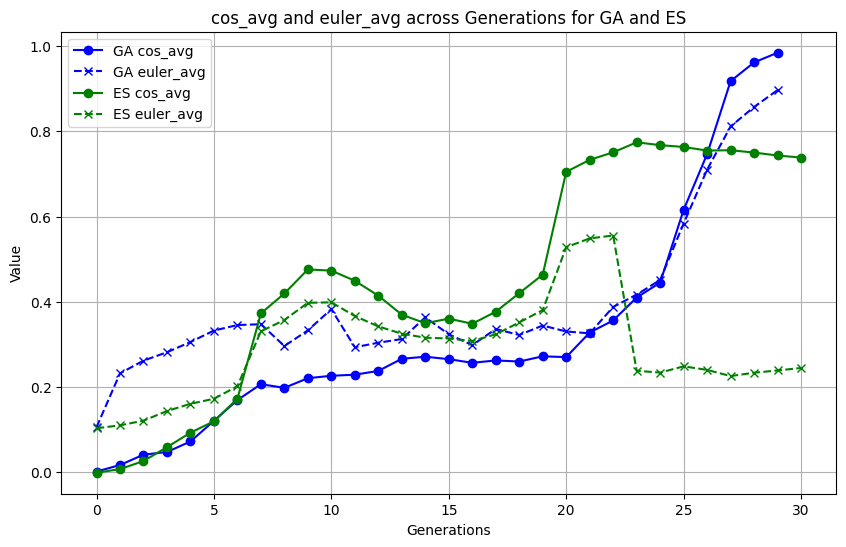

In [77]:


plt.figure(figsize=(10, 6))

# GA lines
plt.plot(ga_data['generation'], ga_data['cos_avg'], label="GA cos_avg", color='blue', marker='o')
plt.plot(ga_data['generation'], ga_data['euler_avg'], label="GA euler_avg", color='blue', linestyle='--', marker='x')

# ES lines
plt.plot(es_data['generation'], es_data['cos_avg'], label="ES cos_avg", color='green', marker='o')
plt.plot(es_data['generation'], es_data['euler_avg'], label="ES euler_avg", color='green', linestyle='--', marker='x')

# add variance_avg
plt.plot(ga_data['generation'], ga_data['variance_avg'], label="GA variance_avg", color='red', marker='o')
plt.plot(es_data['generation'], es_data['variance_avg'], label="ES variance_avg", color='red', linestyle='--', marker='x')

plt.xlabel("Generations")
plt.ylabel("Value")
plt.title("cos_avg and euler_avg across Generations for GA and ES")
plt.legend()
plt.grid(True)
plt.show()

In [41]:
a=np.array([1,2,3])
b=np.array([4,5,6])
np.dot(a,b)
np.linalg.norm(a)
np.linalg.norm(b) 

32

3.7416573867739413

8.774964387392123